## Lead Scoring Case Study
### DS27 | Kishor Kunal | Sapna Mathur

### Problem Statement

An education company named X Education sells online courses to industry professionals.
On any given day, many professionals who are interested in the courses land on their
website and browse for courses.

The company markets its courses on several websites and search engines like Google.
Once these people land on the website, they might browse the courses or fill up a form
for the course or watch some videos. When these people fill up a form providing their
email address or phone number, they are classified to be a lead. Moreover, the company
also gets leads through past referrals. Once these leads are acquired, employees from the
sales team start making calls, writing emails, etc. Through this process, some of the leads
get converted while most do not. The typical lead conversion rate at X education is
around 30%.


Now, although X Education gets a lot of leads, its lead conversion rate is very poor. 
This case study is to help X Education with selecting the most promising leads, i.e. the
leads that are most likely to convert into paying customers. The company requires you to
build a model wherein you need to assign a lead score to each of the leads such that the
customers with higher lead score have a higher conversion chance and the customers
with lower lead score have a lower conversion chance. The CEO, in particular, has given a
ballpark of the target lead conversion rate to be around 80%.



### Goal


1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

#### Data understanding, preparation and EDA

In [2]:
## data preparation

df_leads = pd.read_csv('Leads.csv')
df_leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [3]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
df_leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [5]:
df_leads.isna().sum() ## checking null

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [6]:
(df_leads.isna().sum()/len(df_leads))*100 ## checking null percentage

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [7]:
df_leads.Specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [8]:
## filling in missing values with releavnt data
df_leads['What matters most to you in choosing a course'].fillna('Better Career Prospects',inplace=True) # filling null with Better Career Prospects
df_leads['Lead Source'].fillna('Google',inplace=True) # filling null with Better Google
df_leads['TotalVisits'].fillna(0,inplace=True) # filling null with Better 0
df_leads['Page Views Per Visit'].fillna(0,inplace=True) # filling null with Better 0
df_leads['Last Activity'].fillna('Email Opened',inplace=True) # filling null with Better 0
df_leads['What is your current occupation'].fillna('Unemployed',inplace=True) # filling null with Better 0
df_leads['Lead Quality'].fillna('Not Sure',inplace=True) # filling null with Not Sure
df_leads['Tags'].fillna('Will revert after reading the email',inplace=True) # filling null with Will revert after reading the email
df_leads['Country'].fillna('India',inplace=True) # filling null with India
df_leads['Specialization'].replace('Select','Others', inplace=True)

In [9]:
# replacing defaults with NA
df_leads['Lead Profile'] = df_leads['Lead Profile'].replace('Select',np.nan) # replacing Select with NaN
df_leads['City'].replace('Select',np.nan, inplace=True)
df_leads['How did you hear about X Education'].replace('Select',np.nan, inplace=True)

In [10]:
((df_leads.isna().sum()/len(df_leads))*100) ## checking columns more than 70% null percente

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     0.000000
Country                                           0.000000
Specialization                                   15.562771
How did you hear about X Education               78.463203
What is your current occupation                   0.000000
What matters most to you in choosing a course     0.000000
Search                                            0.0000

In [11]:
## dropping columns with >30%
df_leads = df_leads.drop(['Prospect ID', 'How did you hear about X Education',
             'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 
             'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],axis=1) # also dropping Prospect ID as we don't require this column


In [12]:
((df_leads.isna().sum()/len(df_leads))*100)

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Total Time Spent on Website                       0.000000
Page Views Per Visit                              0.000000
Last Activity                                     0.000000
Country                                           0.000000
Specialization                                   15.562771
What is your current occupation                   0.000000
What matters most to you in choosing a course     0.000000
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

#####  Lead Origin Vs Converted

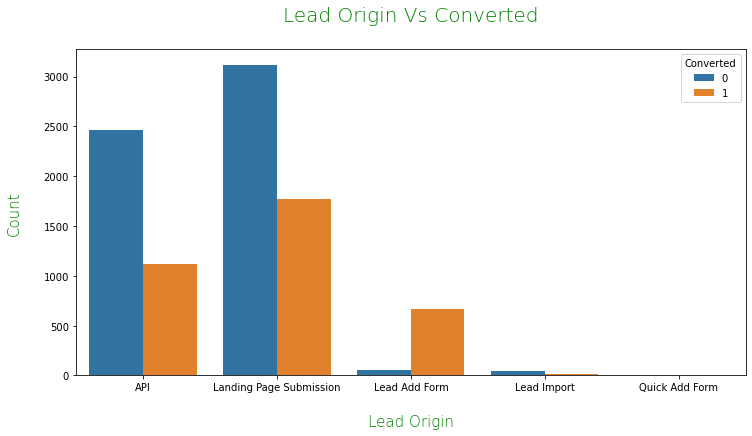

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(data = df_leads ,x = "Lead Origin", hue = "Converted" )

plt.title('Lead Origin Vs Converted\n',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'green'})
plt.xlabel('\nLead Origin', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
plt.ylabel('Count\n', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})

plt.show()

#### :::: Landing Page Submission has the most conversion rate

#####  Lead Source Vs Converted

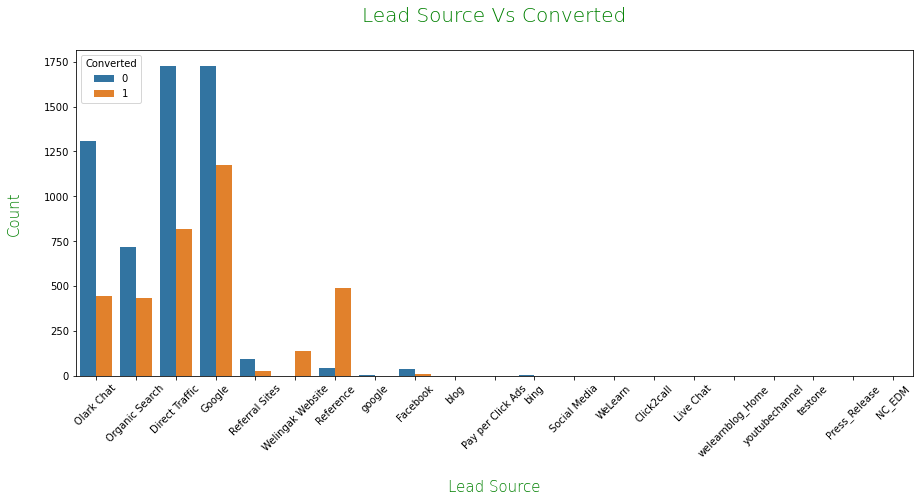

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(data = df_leads ,x = "Lead Source", hue = "Converted")

plt.title('Lead Source Vs Converted\n',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'green'})
plt.xlabel('\nLead Source', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
plt.ylabel('Count\n', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
xticks(rotation = 45)
plt.show()

#### :::: Google leads have the most conversion rate

#####  Do Not Email and Do not call VS Converted

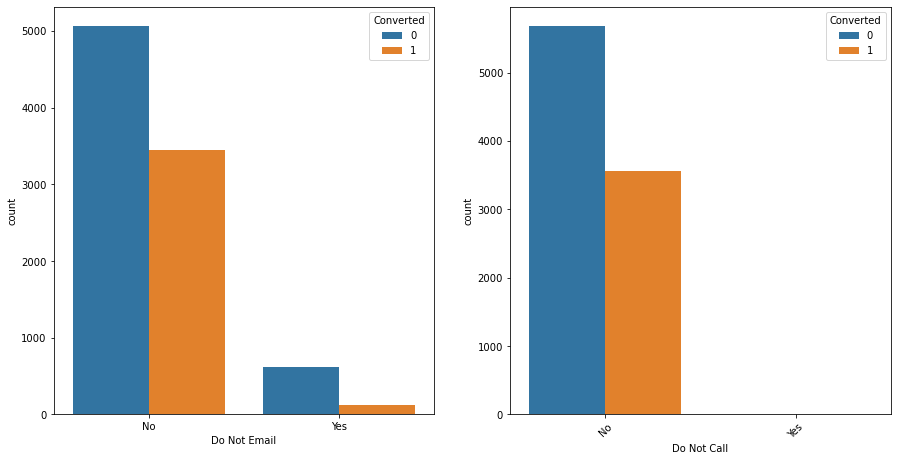

In [15]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = df_leads, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = df_leads, ax = axs[1])

xticks(rotation = 45)
plt.show()

#### :::: Users chosen NO to email and calls have the most conversion rate

#####  Last Activity Vs Converted

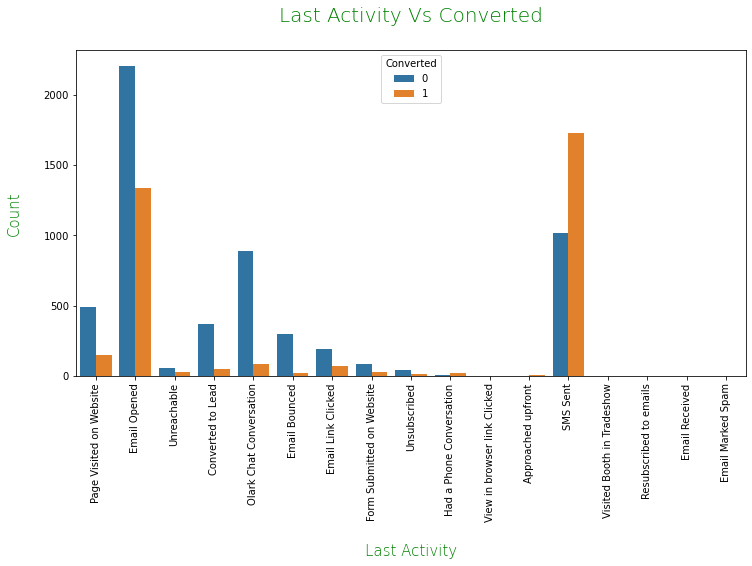

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(data = df_leads ,x = "Last Activity", hue = "Converted")

plt.title('Last Activity Vs Converted\n',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'green'})
plt.xlabel('\nLast Activity', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
plt.ylabel('Count\n', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
xticks(rotation = 90)
plt.show()

#### :::: Email and SMS as the last activty has the best conversation rate

#####  Current Occupation Vs Converted

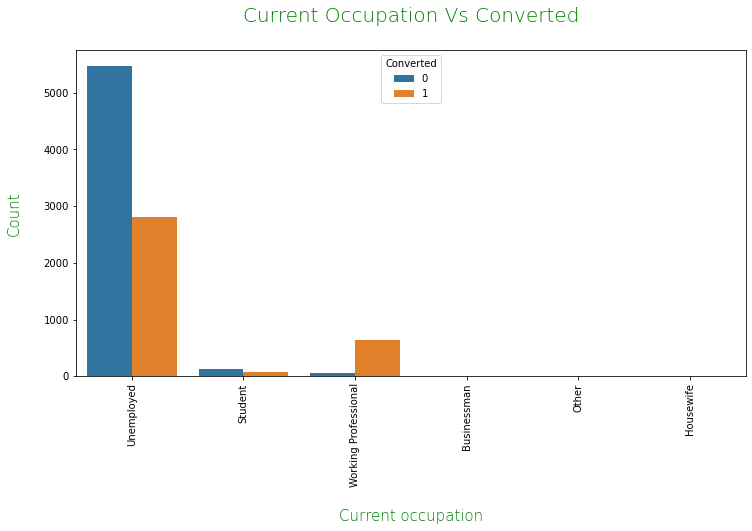

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(data = df_leads ,x = "What is your current occupation", hue = "Converted")

plt.title('Current Occupation Vs Converted\n',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'green'})
plt.xlabel('\nCurrent occupation', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
plt.ylabel('Count\n', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
xticks(rotation = 90)
plt.show()

#### :::: Unemployed users are the target users as they have the best conversation rate

#####  Total Time Spent on Website Vs Converted

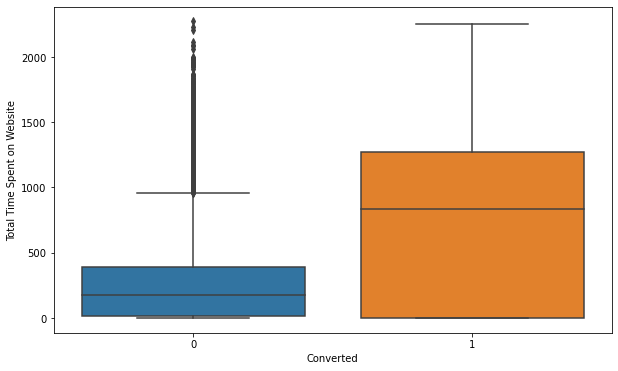

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_leads,x='Converted',y='Total Time Spent on Website')
plt.show()

#### :::: Users spending more time on site are more likely to for Conversion

#####  Current Occupation Vs Converted

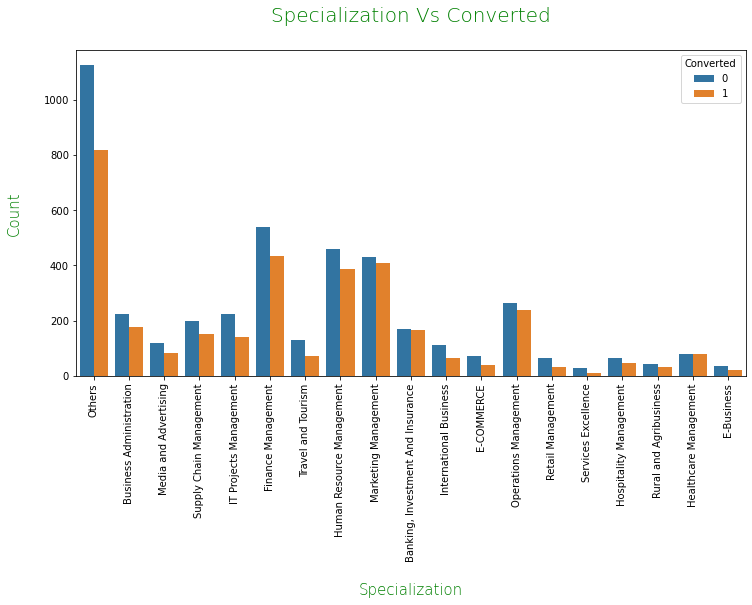

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(data = df_leads ,x = "Specialization", hue = "Converted")

plt.title('Specialization Vs Converted\n',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'green'})
plt.xlabel('\nSpecialization', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
plt.ylabel('Count\n', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
xticks(rotation = 90)
plt.show()

#### :::: Finance management, Merketing management and Human Resouece management users are most likely to get converted

####  What matters most to you in choosing a course Vs Converted

In [20]:
(df_leads['What matters most to you in choosing a course'].value_counts()/
 len(df_leads['What matters most to you in choosing a course']))*100
# Most data is for Better Career Prospects, so no inferences can be drawn

Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [21]:
(df_leads['Search'].value_counts()/ len(df_leads['Search']))*100
# Most data is No, so no inferences can be drawn

No     99.848485
Yes     0.151515
Name: Search, dtype: float64

In [22]:
(df_leads['Magazine'].value_counts()/ len(df_leads['Magazine']))*100
# All data is No, so no inferences can be drawn

No    100.0
Name: Magazine, dtype: float64

In [23]:
(df_leads['Newspaper Article'].value_counts()/ len(df_leads['Newspaper Article']))*100
# most data is No, so no inferences can be drawn

No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64

In [24]:
(df_leads['X Education Forums'].value_counts()/ len(df_leads['X Education Forums']))*100
# most data is No, so no inferences can be drawn ', '', '', ''

No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64

In [25]:
(df_leads['Newspaper'].value_counts()/ len(df_leads['Newspaper']))*100
# most data is No, so no inferences can be drawn

No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64

In [26]:
(df_leads['Digital Advertisement'].value_counts()/ len(df_leads['Digital Advertisement']))*100
# most data is No, so no inferences can be drawn

No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64

In [27]:
(df_leads['Through Recommendations'].value_counts()/ len(df_leads['Through Recommendations']))*100
# most data is No, so no inferences can be drawn

No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64

In [28]:
(df_leads['Receive More Updates About Our Courses'].value_counts()/ len(df_leads['Receive More Updates About Our Courses']))*100
# All data is No, so no inferences can be drawn

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

#####  Tags Vs Converted

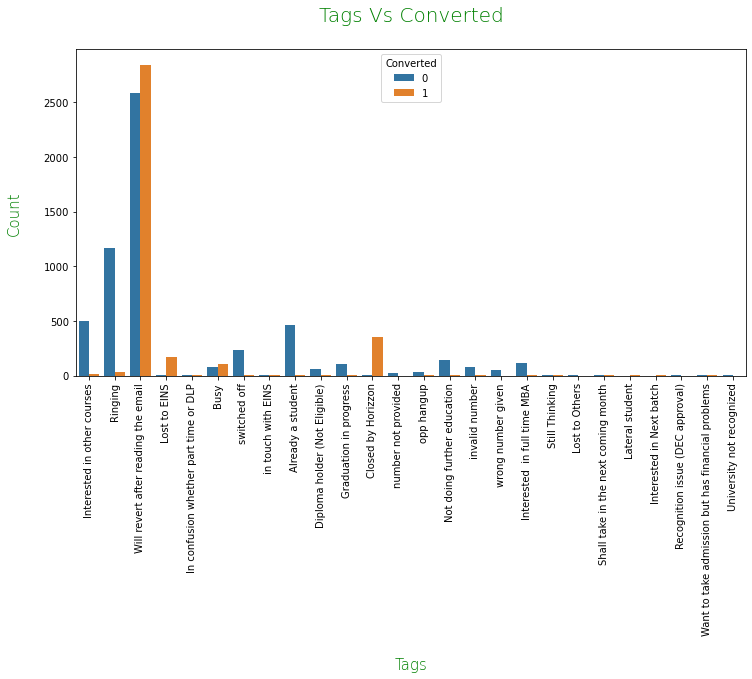

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(data = df_leads ,x = "Tags", hue = "Converted")

plt.title('Tags Vs Converted\n',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'green'})
plt.xlabel('\nTags', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
plt.ylabel('Count\n', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
xticks(rotation = 90)
plt.show()

#### :::: 'Will revert after reading the email' - tagged users are most converted users

#####  Lead Quality Vs Converted

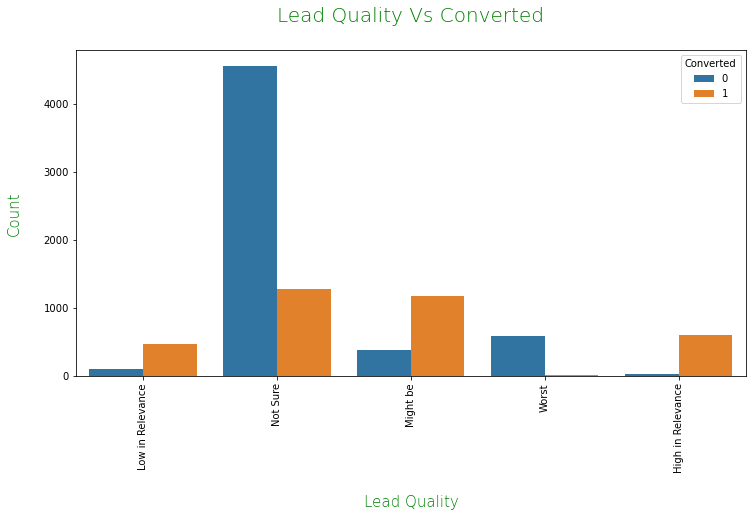

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(data = df_leads ,x = "Lead Quality", hue = "Converted")

plt.title('Lead Quality Vs Converted\n',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'green'})
plt.xlabel('\nLead Quality', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
plt.ylabel('Count\n', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
xticks(rotation = 90)
plt.show()

#### :::: 'Not Sure' and 'Might be' - are good indicators for Lead

In [31]:
(df_leads['Update me on Supply Chain Content'].value_counts()/ len(df_leads['Update me on Supply Chain Content']))*100
# All data is No, so no inferences can be drawn

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [32]:
(df_leads['Get updates on DM Content'].value_counts()/ len(df_leads['Get updates on DM Content']))*100
# All data is No, so no inferences can be drawn

No    100.0
Name: Get updates on DM Content, dtype: float64

In [33]:
(df_leads['I agree to pay the amount through cheque'].value_counts()/ len(df_leads['I agree to pay the amount through cheque']))*100
# All data is No, so no inferences can be drawn

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

In [34]:
(df_leads['A free copy of Mastering The Interview'].value_counts()/ len(df_leads['A free copy of Mastering The Interview']))*100
# All data is No, so no inferences can be drawn

No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64

##### A free copy of Mastering The Interview Vs Converted

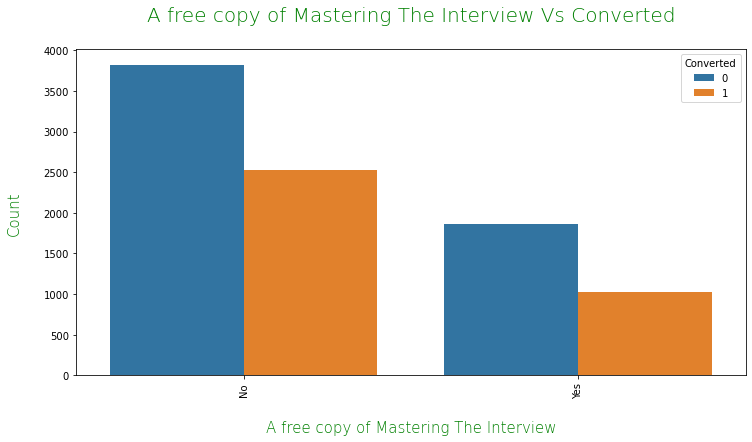

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(data = df_leads ,x = "A free copy of Mastering The Interview", hue = "Converted")

plt.title('A free copy of Mastering The Interview Vs Converted\n',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'green'})
plt.xlabel('\nA free copy of Mastering The Interview', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
plt.ylabel('Count\n', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
xticks(rotation = 90)
plt.show()

#### :::: Customers Not asking for A free copy of Mastering The Interview - are also good indicators for Lead

In [36]:
df_leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

##### Last Notable Activity Vs Converted

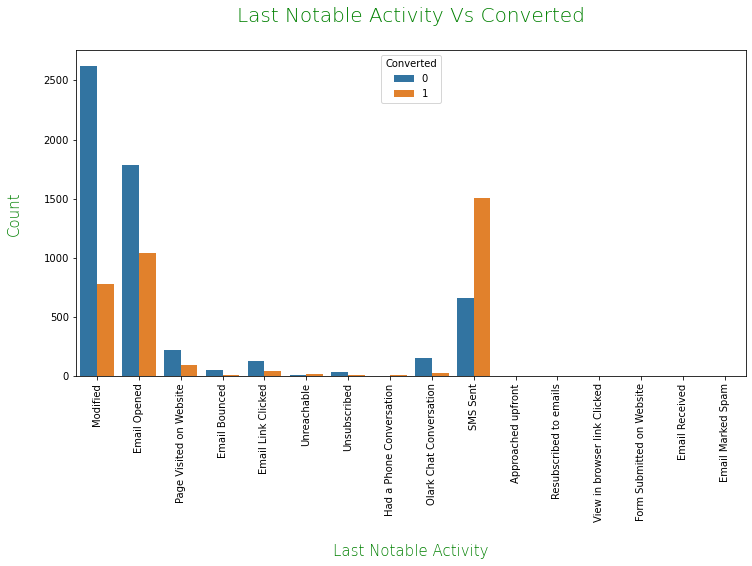

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(data = df_leads ,x = "Last Notable Activity", hue = "Converted")

plt.title('Last Notable Activity Vs Converted\n',fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'green'})
plt.xlabel('\nLast Notable Activity', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
plt.ylabel('Count\n', fontdict={'fontsize': 15, 'fontweight' : 15, 'color' : 'Green'})
xticks(rotation = 90)
plt.show()

#### :::: Users reading SMS as last activity are most likely to convert

### Model Building

In [38]:
## deopping columns with no inferenaces drawn 

df_leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [39]:
df_leads.drop(columns=['I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content',
'Receive More Updates About Our Courses','Through Recommendations','Digital Advertisement','Newspaper','X Education Forums',
'Newspaper Article','Magazine','Search','What matters most to you in choosing a course','Country'],axis=1,inplace=True)

In [40]:
df_leads.shape

(9240, 16)

In [41]:
df_leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [42]:
df_leads.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

  Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0          No          0          0.0                            0   
1          No          0          5.0                          674   
2          No          1          2.0                         1532   
3          No          0          1.0                          305   
4          No          1          2.0                         1428   

   Page Views Per Visit            Last Activity           Specialization  \
0                   0.0  Page Visited on Website                   Others   
1                   2.5             Email Opened                   Others   
2                   2.0             Email Opened  Business Administration   
3                   1.0              Unreachable    Media and Advertising   
4                   1.0        Converted to Lead                   Others   

  What is your current occupation                                 Tags  \
0                      Unemployed          Interested in other courses   
1                      Unemployed                              Ringing   
2                         Student  Will revert after reading the email   
3                      Unemployed                              Ringing   
4                      Unemployed  Will revert after reading the email   

       Lead Quality A free copy of Mastering The Interview  \
0  Low in Relevance                                     No   
1          Not Sure                                     No   
2          Might be                                    Yes   
3          Not Sure                                     No   
4          Might be                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [43]:
# converting Yes and No columns to 0 and 1 ['A free copy of Mastering The Interview','Do Not Email','Do Not Call']
df_leads['A free copy of Mastering The Interview'] = df_leads['A free copy of Mastering The Interview'].apply(lambda x:1 if x=='Yes' else 0)
df_leads['Do Not Email'] = df_leads['Do Not Email'].apply(lambda x:1 if x=='Yes' else 0)
df_leads['Do Not Call'] = df_leads['Do Not Call'].apply(lambda x:1 if x=='Yes' else 0)

In [44]:
## craete dummy variables for catagorical variables
df_dummy = pd.get_dummies(df_leads[['Lead Origin', 'Lead Source', 'Last Activity',
                           'Specialization', 'What is your current occupation', 'Tags','Lead Quality','Last Notable Activity']])

In [45]:
df_dummy.head()

Lead Origin_API  Lead Origin_Landing Page Submission  \
0                1                                    0   
1                1                                    0   
2                0                                    1   
3                0                                    1   
4                0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Lead Origin_Quick Add Form  Lead Source_Click2call  \
0                           0                       0   
1                           0                       0   
2                           0                       0   
3                           0                       0   
4                           0                       0   

   Lead Source_Direct Traffic  Lead Source_Facebook  Lead Source_Google  \
0                           0                     0                   0   
1                           0                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           0                     0                   1   

   Lead Source_Live Chat  ...  \
0                      0  ...   
1                      0  ...   
2                      0  ...   
3                      0  ...   
4                      0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0 

In [46]:
leads = pd.concat([df_leads,df_dummy],axis=1)

In [47]:
leads.head()

Lead Number              Lead Origin     Lead Source  Do Not Email  \
0       660737                      API      Olark Chat             0   
1       660728                      API  Organic Search             0   
2       660727  Landing Page Submission  Direct Traffic             0   
3       660719  Landing Page Submission  Direct Traffic             0   
4       660681  Landing Page Submission          Google             0   

   Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0            0          0          0.0                            0   
1            0          0          5.0                          674   
2            0          1          2.0                         1532   
3            0          0          1.0                          305   
4            0          1          2.0                         1428   

   Page Views Per Visit            Last Activity  ...  \
0                   0.0  Page Visited on Website  ...   
1                   2.5             Email Opened  ...   
2                   2.0             Email Opened  ...   
3                   1.0              Unreachable  ...   
4                   1.0        Converted to Lead  ...   

  Last Notable Activity_Form Submitted on Website  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

  Last Notable Activity_Had a Phone Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

  Last Notable Activity_Modified  \
0                              1   
1                              0   
2                              0   
3                              1   
4                              1   

  Last Notable Activity_Olark Chat Conversation  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

  Last Notable Activity_Resubscribed to emails  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

[5 rows

In [48]:
leads.shape

(9240, 131)

In [49]:
# Dropping columns
leads.drop(['Lead Origin', 'Lead Source', 'Last Activity',
                           'Specialization', 'What is your current occupation', 'Tags','Lead Quality','Last Notable Activity'],
           axis=1,inplace=True)
leads.shape

(9240, 123)

## Creating traning data


In [50]:
# X axis
X = leads.drop(['Converted','Lead Number'],axis=1)
X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_API  Lead Origin_Landing Page Submission  \
0                1                                    0   
1                1                                    0   
2                0                                    1   
3                0                                    1   
4                0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  ...  \
0                          0                        0  ...   
1                          0                        0  ...   
2                          0                        0  ...   
3                          0                        0  ...   
4                          0                        0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                             

In [51]:
# Y axis = Converted
y = leads.Converted 
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [52]:
# splitting test train data
X_train, X_test, y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [53]:
#Scaling

scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
1871             0            0    -0.645678                    -0.885371   
6795             0            0     0.109111                     0.005716   
3516             0            0     0.297808                    -0.691418   
8105             0            0     0.297808                     1.365219   
3934             0            0    -0.645678                    -0.885371   

      Page Views Per Visit  A free copy of Mastering The Interview  \
1871             -1.062143                                       0   
6795             -0.452487                                       1   
3516              0.083827                                       0   
8105              1.229797                                       0   
3934             -1.062143                                       0   

      Lead Origin_API  Lead Origin_Landing Page Submission  \
1871                1                                    0   
6795                0                                    1   
3516                1                                    0   
8105                0                                    1   
3934                1                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  ...  \
1871                          0                        0  ...   
6795                          0                        0  ...   
3516                          0                        0  ...   
8105                          0                        0  ...   
3934                          0                        0  ...   

      Last Notable Activity_Form Submitted on Website  \
1871                                                0   
6795                                                0   
3516                                                0   
8105                                                0   
3934                                                0   

      Last Notable Activity_Had a Phone Conversation  \
1871                                               0   
6795                                               0   
3516                                               0   
8105                                               0   
3934                                               0   

      Last Notable Activity_Modified  \
1871                               0   
6795                               0   
3516                               0   
8105                               0   
3934                               1   

      Last Notable Activity_Olark Chat Conversation  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Page Visited on Website  \
1871                                              0   
6795                                              0   
3516                                              0   
8105                                              0   
3934                                              0   

      Last Notable Activity_Resubscribed to emails  \
1871                                             0   
6795                                             0   
3516                                             0   
8105                                             0   
3934                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
1871                               0                                  0   
6795                               0                                  0   
3516                               0                                  0   
8105                               1                                  0   
3934                               0                                  0   


In [54]:
(sum(leads['Converted'])/len(leads['Converted'].index))*100 #Checking conversion rate

38.53896103896104

In [55]:
## Building model

In [56]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                          109
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 14 Jun 2021   Deviance:                          nan
Time:                        22:06:35   Pearson chi2:                 3.13e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   7.338e+14   1.31e+07    5.6e+07      0.000    7.34e+14    7.34e+14
Do Not Email                                            -1.32e+14   4.47e+06  -2.95e+07      0.000   -1.32e+14   -1.32e+14
Do Not Call                                             1.223e+15   4.78e+07   2.56e+07      0.000    1.22e+15    1.22e+15
TotalVisits                                             5.094e+13      1e+06   5.09e+07      0.000    5.09e+13    5.09e+13
Total Time Spent on Website                             2.549e+14   9.99e+05   2.55e+08      0.000    2.55e+14    2.55e+14
Page Views Per Visit                                    -3.14e+13   1.22e+06  -2.58e+07      0.000   -3.14e+13   -3.14e+13
A free copy of Mastering The Interview                  2.831e+13   2.68e+06   1.06e+07      0.000    2.83e+13    2.83e+13
Lead Origin_API                                        -7.164e+14   1.54e+07  -4.64e+07      0.000   -7.16e+14   -7.16e+14
Lead Origin_Landing Page Submission                    -8.606e+14   1.54e+07  -5.58e+07      0.000   -8.61e+14   -8.61e+14
Lead Origin_Lead Add Form                              -5.206e+14   1.83e+07  -2.84e+07      0.000   -5.21e+14   -5.21e+14
Lead Origin_Lead Import                                 1.284e+15   4.17e+07   3.08e+07      0.000    1.28e+15    1.28e+15
Lead Origin_Quick Add Form                              1.548e+15   5.66e+07   2.74e+07      0.000    1.55e+15    1.55e+15
Lead Source_Click2call                                  3.677e+14   4.12e+07   8.92e+06      0.000    3.68e+14    3.68e+14
Lead Source_Direct Traffic                              4.172e+14   1.04e+07      4e+07      0.000    4.17e+14    4.17e+14
Lead Source_Facebook                                   -1.684e+15    4.7e+07  -3.58e+07      0.000   -1.68e+15   -1.68e+15
Lead Source_Google                                       4.41e+14   1.03e+07    4.3e+07      0.000    4.41e+14    4.41e+14
Lead Source_Live Chat                                   4.116e+15   4.73e+07    8.7e+07      0.000    4.12e+15    4.12e+15
Lead Source_NC_EDM                                      5.946e+15   6.47e+07   9.19e+07      0.000    5.95e+15    5.95e+15
Lead Source_Olark Chat                                  6.446e+14   1.06e+07   6.06e+07      0.000    6.45e+14    6.45e+14
Lead Source_Organic Search                              4.438e+14   1.05e+07   4.22e+07      0.000    4.44e+14    4.44e+14
Lead Source_Pay per Click Ads                          -2.266e+15   6.47e+07   -3.5e+07      0.000   -2.27e+15   -2.27e+15
Lead Source_Press_Release                              -3.072e+15   4.68e+07  -6.57e+07      0.000   -3.07e+15   -3.07e+15
Lead Sou

In [57]:
## RFE 
logreg = LogisticRegression()
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [58]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 12),
 ('Do Not Call', False, 47),
 ('TotalVisits', False, 78),
 ('Total Time Spent on Website', False, 15),
 ('Page Views Per Visit', False, 86),
 ('A free copy of Mastering The Interview', False, 89),
 ('Lead Origin_API', False, 46),
 ('Lead Origin_Landing Page Submission', False, 45),
 ('Lead Origin_Lead Add Form', False, 14),
 ('Lead Origin_Lead Import', False, 83),
 ('Lead Origin_Quick Add Form', False, 61),
 ('Lead Source_Click2call', False, 69),
 ('Lead Source_Direct Traffic', False, 81),
 ('Lead Source_Facebook', False, 44),
 ('Lead Source_Google', False, 93),
 ('Lead Source_Live Chat', False, 87),
 ('Lead Source_NC_EDM', False, 40),
 ('Lead Source_Olark Chat', False, 27),
 ('Lead Source_Organic Search', False, 94),
 ('Lead Source_Pay per Click Ads', False, 104),
 ('Lead Source_Press_Release', False, 84),
 ('Lead Source_Reference', False, 72),
 ('Lead Source_Referral Sites', False, 77),
 ('Lead Source_Social Media', False, 60),
 ('Lead Source_WeLearn', F

In [59]:
cols = X_train.columns[rfe.support_]
cols

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Specialization_Others',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_number not provided',
       'Tags_switched off', 'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified'],
      dtype='object')

In [60]:
X_train.columns[~rfe.support_] # removing non supported cols

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import',
       ...
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=106)

In [61]:
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1520.2
Date:                Mon, 14 Jun 2021   Deviance:                       3040.3
Time:                        22:06:42   Pearson chi2:                 5.19e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6549      0.224     -7.375      0.000      -2.095      -1.215
Lead Source_Welingak Website                             3.2361      0.773      4.185      0.000       1.720       4.752
Last Activity_SMS Sent                                   2.0045      0.104     19.204      0.000       1.800       2.209
Specialization_Others                                    1.6138      0.127     12.725      0.000       1.365       1.862
What is your current occupation_Working Professional     1.6235      0.289      5.623      0.000       1.058       2.189
Tags_Already a student                                  -1.2321      0.785     -1.569      0.117      -2.771       0.307
Tags_Busy                                                3.8372      0.319     12.020      0.000       3.212       4.463
Tags_Closed by Horizzon                                  9.5060      1.051      9.046      0.000       7.446      11.565
Tags_Lost to EINS                                        9.8308      0.762     12.903      0.000       8.337      11.324
Tags_Ringing                                            -1.9328      0.323     -5.985      0.000      -2.566      -1.300
Tags_Will revert after reading the email                 3.8922      0.232     16.765      0.000       3.437       4.347
Tags_number not provided                               -22.0170   1.33e+04     -0.002      0.999   -2.61e+04     2.6e+04
Tags_switched off                                       -2.6897      0.597     -4.507      0.000      -3.859      -1.520
Lead Quality_Not Sure                                   -3.6025      0.133    -27.035      0.000      -3.864      -3.341
Lead Quality_Worst                                      -3.4618      0.716     -4.838      0.000      -4.864      -2.059
Last Notable Activity_Modified                          -1.5663      0.106    -14.737      0.000      -1.775      -1.358
========================================================================================================================
"""

In [62]:
# removing Tags_number not provided as p value>0.5
cols2 = cols.drop('Tags_number not provided',1)
cols2

Index(['Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Specialization_Others',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_Modified'],
      dtype='object')

In [63]:
#regression 3
X_train_sm = sm.add_constant(X_train[cols2])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1525.0
Date:                Mon, 14 Jun 2021   Deviance:                       3050.0
Time:                        22:06:43   Pearson chi2:                 5.10e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8078      0.223     -8.113      0.000      -2.245      -1.371
Lead Source_Welingak Website                             3.2241      0.773      4.172      0.000       1.710       4.739
Last Activity_SMS Sent                                   1.9915      0.104     19.151      0.000       1.788       2.195
Specialization_Others                                    1.6191      0.127     12.784      0.000       1.371       1.867
What is your current occupation_Working Professional     1.6483      0.290      5.675      0.000       1.079       2.218
Tags_Already a student                                  -1.0983      0.786     -1.398      0.162      -2.639       0.442
Tags_Busy                                                3.9806      0.319     12.483      0.000       3.356       4.606
Tags_Closed by Horizzon                                  9.6307      1.051      9.163      0.000       7.571      11.691
Tags_Lost to EINS                                        9.9550      0.762     13.057      0.000       8.461      11.449
Tags_Ringing                                            -1.7755      0.321     -5.532      0.000      -2.405      -1.146
Tags_Will revert after reading the email                 4.0303      0.232     17.337      0.000       3.575       4.486
Tags_switched off                                       -2.5316      0.596     -4.250      0.000      -3.699      -1.364
Lead Quality_Not Sure                                   -3.5871      0.133    -26.994      0.000      -3.848      -3.327
Lead Quality_Worst                                      -3.4406      0.719     -4.782      0.000      -4.851      -2.031
Last Notable Activity_Modified                          -1.5507      0.106    -14.638      0.000      -1.758      -1.343
========================================================================================================================
"""

In [64]:
# summay looks fine now so getting the predicted values on the train set
y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

1871    0.000768
6795    0.563294
3516    0.003867
8105    0.169123
3934    0.214805
4844    0.997163
3297    0.000768
8071    0.999637
987     0.051403
7423    0.997079
dtype: float64

In [65]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([7.68443987e-04, 5.63293717e-01, 3.86745709e-03, 1.69123050e-01,
       2.14805336e-01, 9.97163307e-01, 7.68443987e-04, 9.99636908e-01,
       5.14028548e-02, 9.97079452e-01])

In [66]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Probility':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Probility  Lead Number
0          0             0.000768         1871
1          0             0.563294         6795
2          0             0.003867         3516
3          0             0.169123         8105
4          0             0.214805         3934

In [67]:
#creating predicted for convertion probability>0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Probility.map(lambda x: 1 if x > 0.5 else 0) 
y_train_pred_final.head()

Converted  Converted_Probility  Lead Number  Predicted
0          0             0.000768         1871          0
1          0             0.563294         6795          1
2          0             0.003867         3516          0
3          0             0.169123         8105          0
4          0             0.214805         3934          0

In [68]:
# Confusion matrix 
confusion=metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )

In [69]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted) # accurecy score

0.922077922077922

In [70]:
TP = confusion[1,1] # True positiv 
TN = confusion[0,0] # True negative
FP = confusion[0,1] # False positive
FN = confusion[1,0] # False negative

In [71]:
# sensitivity
TP / float(TP+FN)

0.8913219789132197

In [72]:
#specificity
TN / float(TN+FP)

0.9410294852573713

In [73]:
FP/ float(TN+FP) #false postive rate - predicting churn when customer does not have churned

0.05897051474262868

In [74]:
TP / float(TP+FP) #Positive predictive value 

0.9030402629416598

In [75]:
TN / float(TN+ FN) #Negative predictive value

0.9335647000495786

In [76]:
## predicting on Test set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test = X_test[cols2]
X_test.head()

Lead Source_Welingak Website  Last Activity_SMS Sent  \
4269                             0                       1   
2376                             0                       1   
7766                             0                       0   
9199                             0                       0   
4359                             0                       0   

      Specialization_Others  \
4269                      0   
2376                      1   
7766                      0   
9199                      1   
4359                      0   

      What is your current occupation_Working Professional  \
4269                                                  0      
2376                                                  0      
7766                                                  1      
9199                                                  0      
4359                                                  0      

      Tags_Already a student  Tags_Busy  Tags_Closed by Horizzon  \
4269                       0          0                        0   
2376                       0          0                        0   
7766                       0          0                        0   
9199                       1          0                        0   
4359                       0          0                        0   

      Tags_Lost to EINS  Tags_Ringing  \
4269                  0             0   
2376                  0             0   
7766                  0             0   
9199                  0             0   
4359                  0             0   

      Tags_Will revert after reading the email  Tags_switched off  \
4269                                         1                  0   
2376                                         1                  0   
7766                                         1                  0   
9199                                         0                  0   
4359                                         1                  0   

      Lead Quality_Not Sure  Lead Quality_Worst  \
4269                      1                   0   
2376                      0                   0   
7766                      0                   0   
9199                      1                   0   
4359                      0                   0   

      Last Notable Activity_Modified  
4269                               0  
2376                               0  
7766                               0  
9199                               1  
4359                               0

In [77]:
X_test_sm = sm.add_constant(X_test)

In [78]:
y_test_pred = result.predict(X_test_sm)

In [79]:
y_test_pred[:10]

4269    0.651786
2376    0.997079
7766    0.979584
9199    0.001618
4359    0.902253
9186    0.985428
1631    0.902253
8963    0.978992
8007    0.051403
5324    0.985428
dtype: float64

In [80]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
4269  0.651786
2376  0.997079
7766  0.979584
9199  0.001618
4359  0.902253

In [81]:
y_test_df = pd.DataFrame(y_test)

In [82]:
y_test_df['Lead Number'] = y_test_df.index

In [83]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [84]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

Converted  Lead Number         0
0          1         4269  0.651786
1          1         2376  0.997079
2          1         7766  0.979584
3          0         9199  0.001618
4          1         4359  0.902253

In [85]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Probability'})
y_pred_final.head()

Converted  Lead Number  Converted_Probability
0          1         4269               0.651786
1          1         2376               0.997079
2          1         7766               0.979584
3          0         9199               0.001618
4          1         4359               0.902253

In [86]:
y_pred_final['Final_Predicted'] = y_pred_final.Converted_Probability.map(lambda x: 1 if x > 0.2 else 0)
y_pred_final.head()

Converted  Lead Number  Converted_Probability  Final_Predicted
0          1         4269               0.651786                1
1          1         2376               0.997079                1
2          1         7766               0.979584                1
3          0         9199               0.001618                0
4          1         4359               0.902253                1

In [87]:
#confusion metrix
confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted )
confusion

array([[1160,  517],
       [  42, 1053]], dtype=int64)

In [88]:
TP = confusion[1,1] # True positiv 
TN = confusion[0,0] # True negative
FP = confusion[0,1] # False positive
FN = confusion[1,0] # False negative

In [89]:
TP / float(TP+FN) # sensitivity

0.9616438356164384

In [90]:
TN / float(TN+FP) #specificity

0.691711389385808

In [91]:
#accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.7983405483405484